In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter

In [5]:
# Load the datasets
train_df = pd.read_csv(
    '/content/drive/MyDrive/train_data.txt',
    sep=" ::: ",
    names=['id', 'title', 'genre', 'description'],
    engine='python',
    skipinitialspace=True
)

In [6]:
train_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
train_df.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [12]:
train_df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [13]:
test_df = pd.read_csv(
    '/content/drive/MyDrive/test_data_solution.txt',
    sep=" ::: ",
    names=['id', 'title', 'genre', 'description'],
    engine='python',
    skipinitialspace=True
)

In [14]:
test_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [16]:
test_df.describe()

,id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [17]:
test_df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [18]:
# Drop any missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)



In [19]:
# Drop duplicates
train_df = train_df.drop_duplicates()


In [20]:
# Print before cleaning
print("Before Cleaning:")
print(train_df[['description']].head())


Before Cleaning:
                                         description
0  Listening in to a conversation between his doc...
1  A brother and sister with a past incestuous re...
2  As the bus empties the students for their fiel...
3  To help their unemployed father make ends meet...
4  The film's title refers not only to the un-rec...


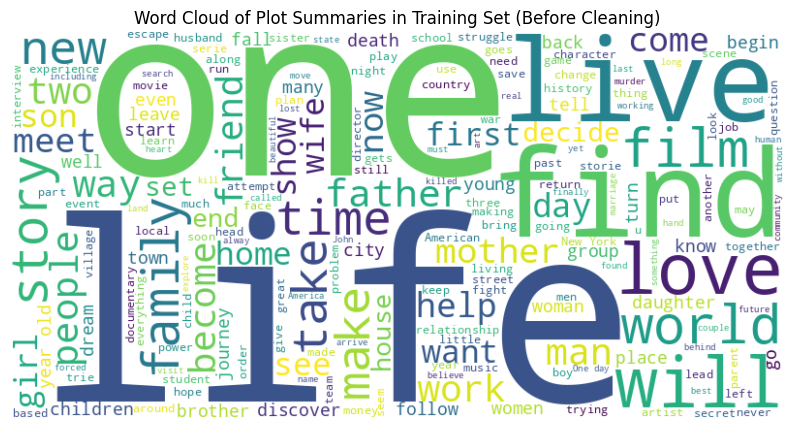

In [21]:
# Word Cloud of plot summaries before cleaning
train_text_before = " ".join(train_df['description'])
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(train_text_before)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plot Summaries in Training Set (Before Cleaning)')
plt.show()


In [22]:
# Text Cleaning
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
def clean_data(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    text = ' '.join([word for word in tokens if word not in stop_words and len(word) > 2])  # Remove stopwords and short words
    return text


In [24]:
train_df['description_cleaned'] = train_df['description'].apply(clean_data)
test_df['description_cleaned'] = test_df['description'].apply(clean_data)



In [26]:
# Print after cleaning
print("\nAfter Cleaning:")
print(train_df[['description_cleaned']].head())




After Cleaning:
                                 description_cleaned
0  listening conversation doctor parents yearold ...
1  brother sister past incestuous relationship cu...
2  bus empties students field trip museum natural...
3  help unemployed father make ends meet edith tw...
4  films title refers unrecovered bodies ground z...


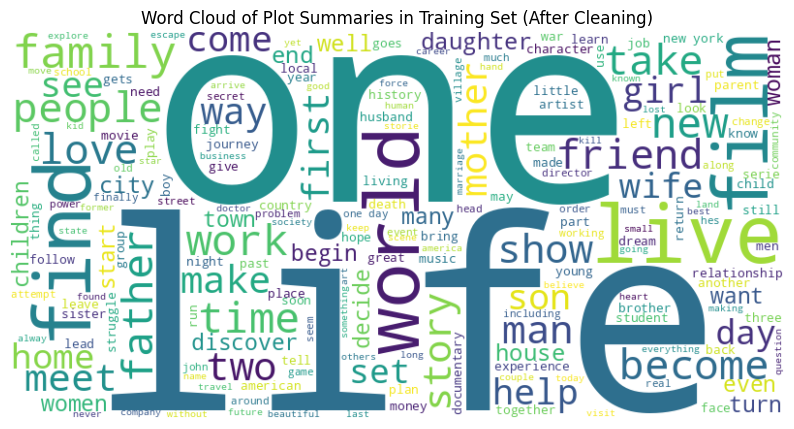

In [27]:
# Word Cloud of plot summaries after cleaning
train_text_after = " ".join(train_df['description_cleaned'])
wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate(train_text_after)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plot Summaries in Training Set (After Cleaning)')
plt.show()


In [28]:
# Stemming
st = PorterStemmer()
train_df['description_cleaned'] = train_df['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_df['description_cleaned'] = test_df['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))


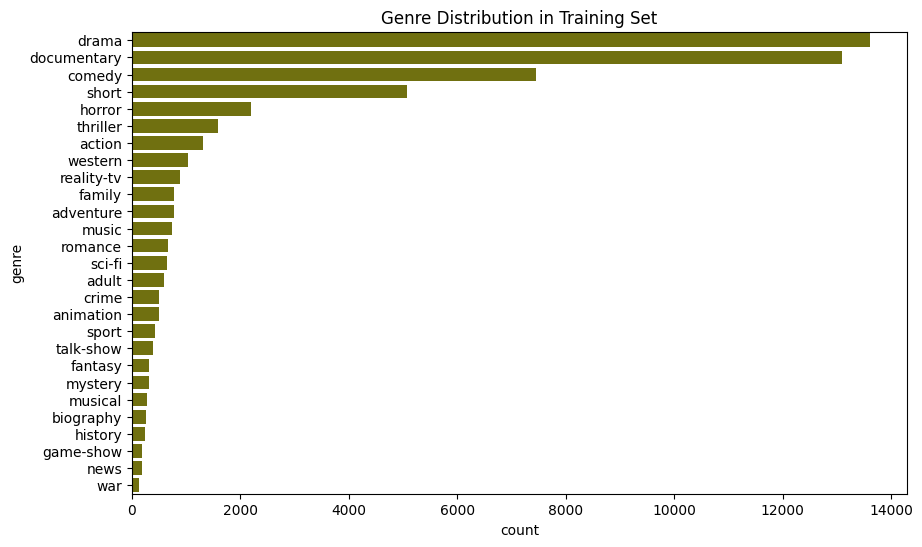

In [29]:
# EDA
# Genre distribution in the training set
plt.figure(figsize=(10, 6))
sns.countplot(y=train_df['genre'], order=train_df['genre'].value_counts().index,color='olive')
plt.title('Genre Distribution in Training Set')
plt.show()


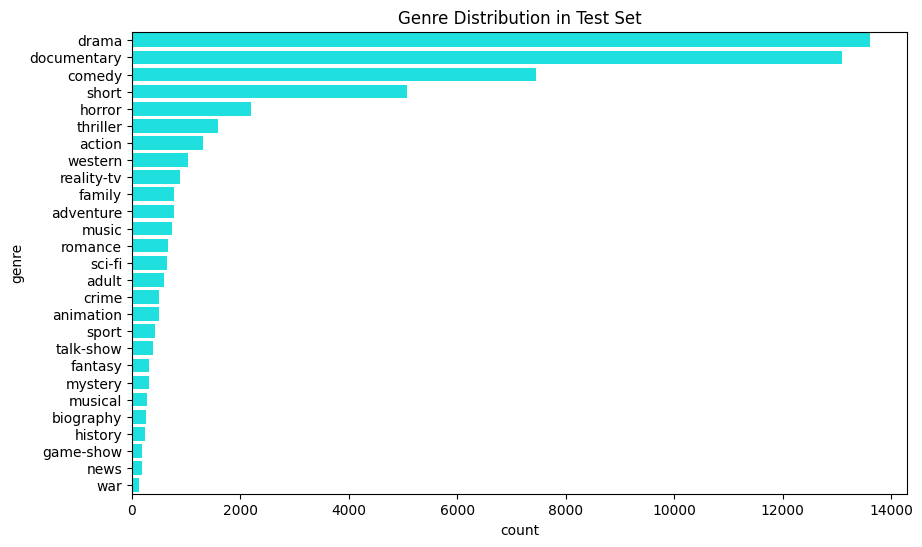

In [30]:
# Genre distribution in the test set
plt.figure(figsize=(10, 6))
sns.countplot(y=test_df['genre'], order=test_df['genre'].value_counts().index,color='cyan')
plt.title('Genre Distribution in Test Set')
plt.show()




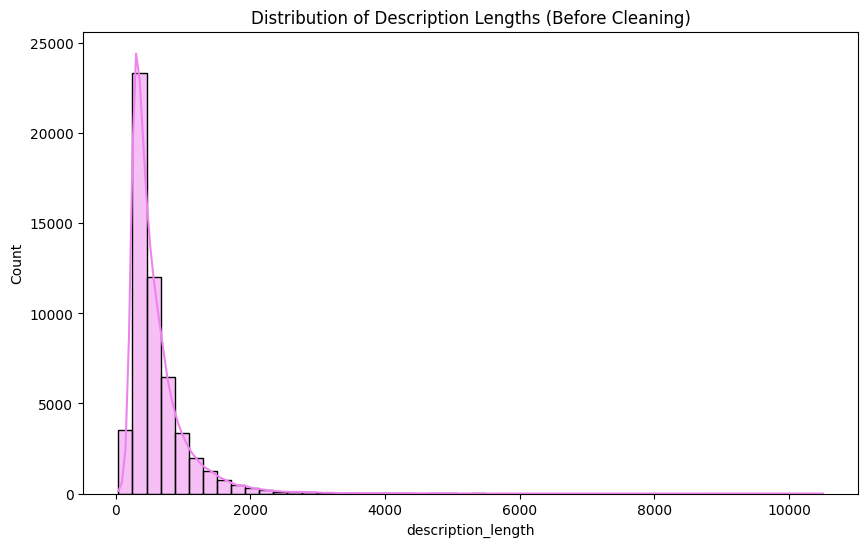

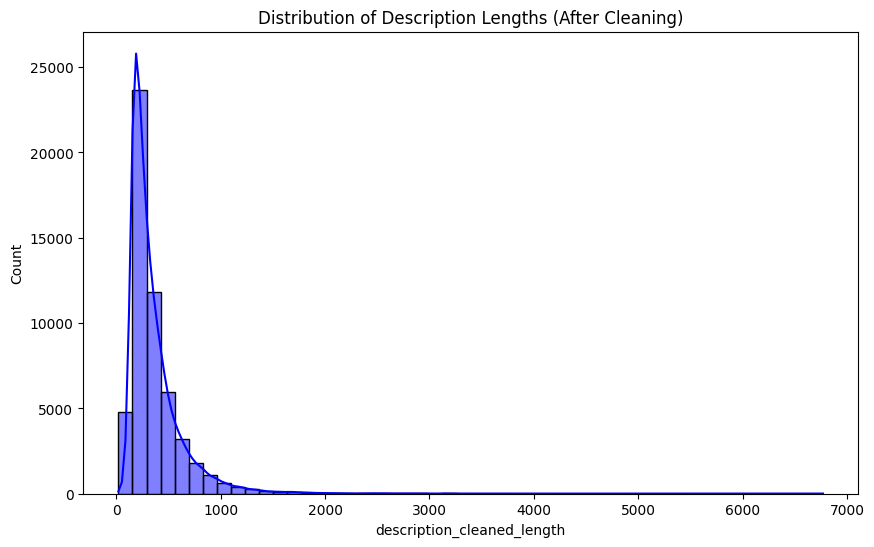

In [31]:
#  Distribution of text lengths
train_df['description_length'] = train_df['description'].apply(len)
train_df['description_cleaned_length'] = train_df['description_cleaned'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_df['description_length'], bins=50, kde=True,color='violet')
plt.title('Distribution of Description Lengths (Before Cleaning)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_df['description_cleaned_length'], bins=50, kde=True,color='blue')
plt.title('Distribution of Description Lengths (After Cleaning)')
plt.show()


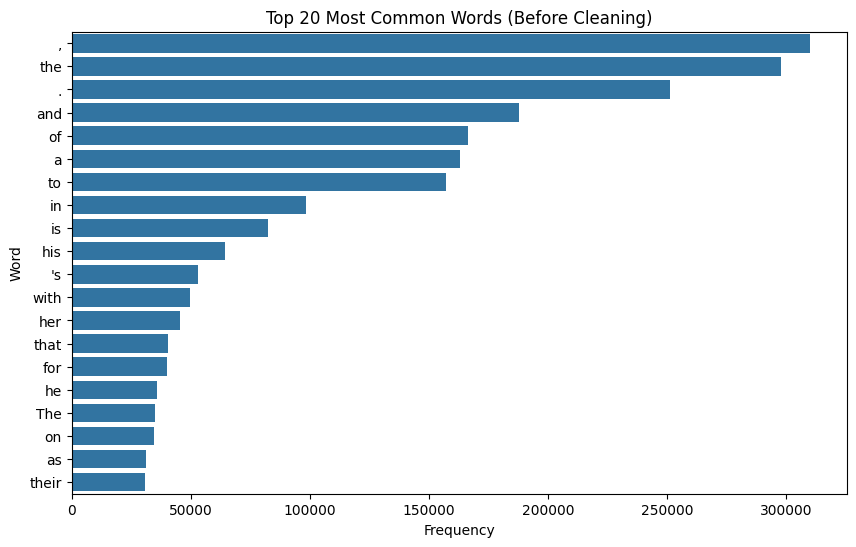

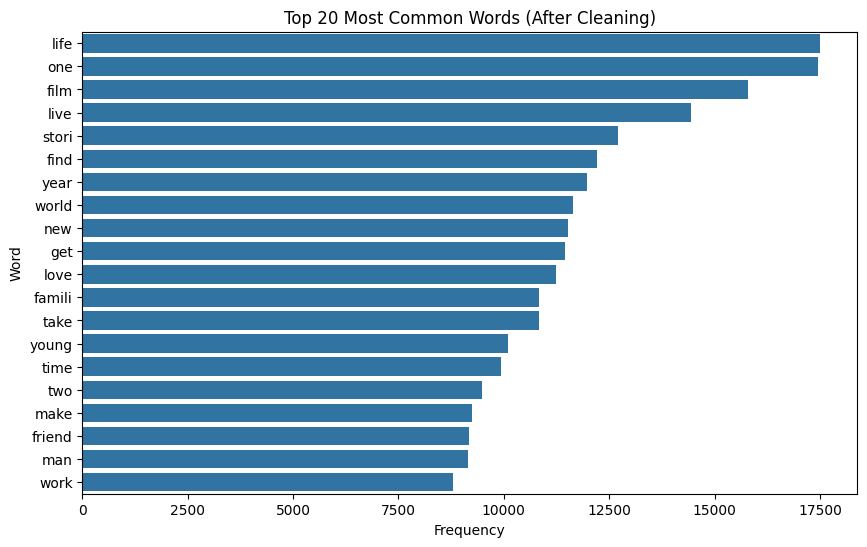

In [32]:
# Top N most common words before and after cleaning
def plot_top_n_words(text, title, n=20):
    words = word_tokenize(" ".join(text))
    word_freq = Counter(words)
    common_words = word_freq.most_common(n)
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=common_words_df)
    plt.title(title)
    plt.show()

plot_top_n_words(train_df['description'], 'Top 20 Most Common Words (Before Cleaning)')
plot_top_n_words(train_df['description_cleaned'], 'Top 20 Most Common Words (After Cleaning)')


In [33]:
# Preprocessing
X_train = train_df['description']
y_train = train_df['genre']
X_test = test_df['description']
y_test = test_df['genre']



In [34]:
# Transform text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [35]:
# Initialize the classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)

In [36]:
# Train the classifiers
nb_classifier.fit(X_train_tfidf, y_train)
lr_classifier.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [37]:
def evaluate_model(model, X_test_tfidf, y_test):
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}\n')
    print(f'Classification Report:\n{report}\n')

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Naive Bayes Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4447

Classification Report:
              precision    recall  f1-score   support

      action     0.0000    0.0000    0.0000      1314
       adult     0.0000    0.0000    0.0000       590
   adventure     0.0000    0.0000    0.0000       775
   animation     0.0000    0.0000    0.0000       498
   biography     0.0000    0.0000    0.0000       264
      comedy     0.7223    0.0482    0.0904      7446
       crime     0.0000    0.0000    0.0000       505
 documentary     0.5256    0.9022    0.6642     13096
       drama     0.3817    0.8751    0.5316     13612
      family     0.0000    0.0000    0.0000       783
     fantasy     0.0000    0.0000    0.0000       322
   game-show     0.0000    0.0000    0.0000       193
     history     0.0000    0.0000    0.0000       243
      horror     0.0000    0.0000    0.0000      2204
       music     0.0000    0.0000    0.0000       731
     musical     0.0000    0.0000    0.0000       276
     mystery     0.0000    0.0000    0.0

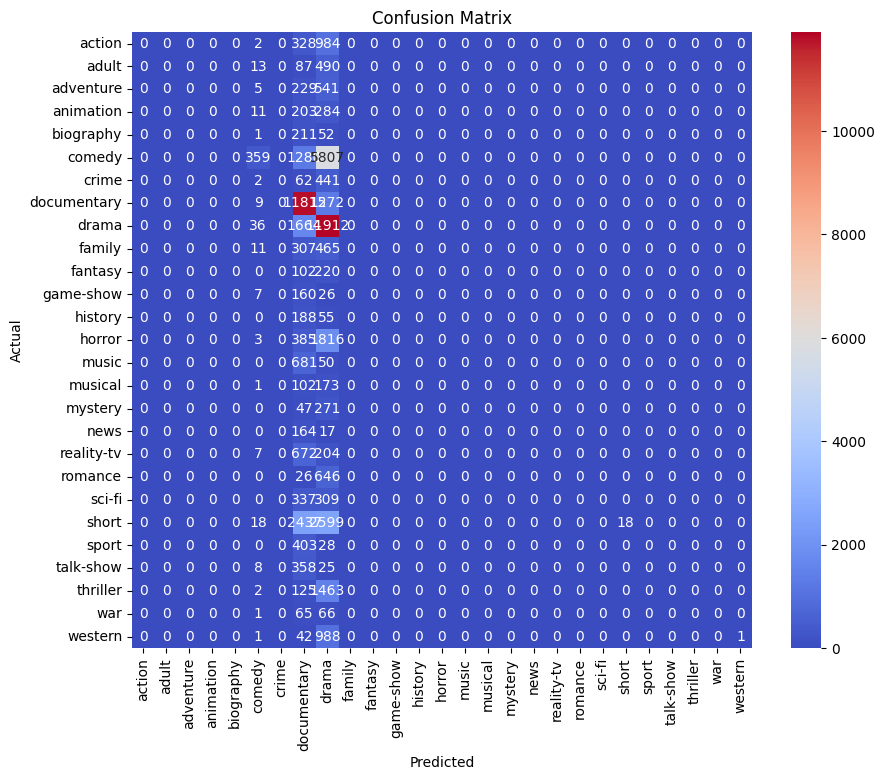

In [38]:
print("Naive Bayes Classifier:")
evaluate_model(nb_classifier, X_test_tfidf, y_test)

Logistic Regression Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5883

Classification Report:
              precision    recall  f1-score   support

      action     0.5247    0.2588    0.3466      1314
       adult     0.6205    0.2051    0.3083       590
   adventure     0.6937    0.1432    0.2374       775
   animation     0.6000    0.0241    0.0463       498
   biography     0.0000    0.0000    0.0000       264
      comedy     0.5479    0.5881    0.5673      7446
       crime     0.4167    0.0198    0.0378       505
 documentary     0.6587    0.8698    0.7497     13096
       drama     0.5356    0.8034    0.6427     13612
      family     0.5794    0.0792    0.1393       783
     fantasy     0.7143    0.0155    0.0304       322
   game-show     0.9300    0.4819    0.6348       193
     history     0.0000    0.0000    0.0000       243
      horror     0.6649    0.5690    0.6132      2204
       music     0.6973    0.3940    0.5035       731
     musical     1.0000    0.0072    0.0144       276
     mystery     1.0000    0.0031    0.0

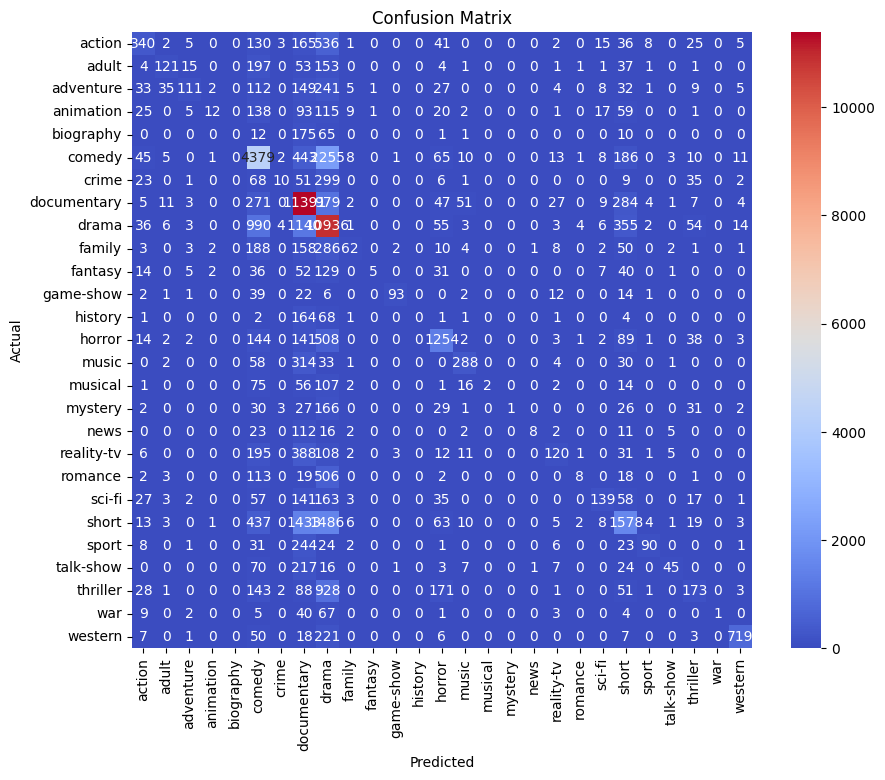

In [39]:
print("Logistic Regression Classifier:")
evaluate_model(lr_classifier, X_test_tfidf, y_test)
